Run#: 1
The seed for random thetas initializing:  4
Thetas initial vector: [0.96702984 0.54723225 0.97268436 0.71481599 0.69772882 0.2160895
 0.97627445 0.00623026 0.25298236 0.43479153 0.77938292 0.19768507
 0.86299324]
COST: 104.19182214983174
Thetas [[ 9.45282871 -0.36073736  1.23324811 -0.18437224  0.98914282 -0.49618843
   2.67385578 -0.53076035  0.1876191  -0.26926078 -0.22162176 -1.00696044
   1.33788675]]
Last 10 costs [104.35345125 104.33547782 104.31750805 104.29954194 104.2815795
 104.26362071 104.24566558 104.22771411 104.2097663  104.19182215]
Run#: 2
The seed for random thetas initializing:  4
Thetas initial vector: [0.96702984 0.54723225 0.97268436 0.71481599 0.69772882 0.2160895
 0.97627445 0.00623026 0.25298236 0.43479153 0.77938292 0.19768507
 0.86299324]
COST: 47.61333463429669
Thetas [[14.59999395 -0.57559031  1.03529294 -0.29844173  1.07792988 -0.56785439
   3.4742146  -0.53568758 -0.33395911 -0.1808832  -0.35704135 -1.41007076
   1.34218017]]
Last 10 costs [47.732

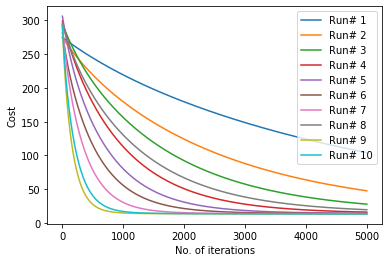

In [26]:
# https://towardsdatascience.com/implementation-of-multi-variate-linear-regression-in-python-using-gradient-descent-optimization-b02f386425b9

import numpy as np
import matplotlib.pyplot as plt
import random
from random import gauss
from numpy.random import rand
from numpy.random import seed

def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h
# ======================================
def thetas_initializing(ln):
    r = random.randint(0, 10)
    print('The seed for random thetas initializing: ', r)
    seed(r)
    return rand(ln)
# ======================================
data = np.loadtxt('BostonHousingDataset.csv', delimiter=',')
X_train = data[:,0:12] #feature set
y_train = data[:,13] #label set
# print(X_train)
# print(y_train)
# ======================================
def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = thetas_initializing(n+1)
    print('Thetas initial vector:', theta)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
#         print('i#:', i, "\t::θ's:", theta, '\t::cost:', cost[i], '\n')
    theta = theta.reshape(1,n+1)
    return theta, cost
# ======================================
mean = np.ones(X_train.shape[1])
std = np.ones(X_train.shape[1])
for i in range(0, X_train.shape[1]):
    mean[i] = np.mean(X_train.transpose()[i])
    std[i] = np.std(X_train.transpose()[i])
    for j in range(0, X_train.shape[0]):
        X_train[j][i] = (X_train[j][i] - mean[i])/std[i]


# ======================================
# calling the principal function with learning_rate and num_iters 
# num_iters = 5000
# rate =  0.000077

# theta, cost = linear_regression(X_train, y_train, rate, num_iters)
# print('COST:', cost[num_iters-1])
# print('Thetas', theta)
# print('Last 10 costs', cost[-10:])
# # draw cost vs iteration for all
# cost = list(cost)
# n_iterations = [x for x in range(1,num_iters+1)]
# plt.plot(n_iterations, cost, label = "#of iters" + str(num_iters) + ", rate" + str(rate))
# plt.xlabel('No. of iterations')
# plt.ylabel('Cost')
# plt.legend(loc='upper right')

# the_10_iters = [100, 500, 1000, 1500, 3000]
the_10_rates = [0.0001, 0.0002, 0.0003, 0.0005, 0.0007, 0.0009, 0.0014, 0.0004, 0.003, 0.0023]

# Perform the 10 different runs with different starting points
for i in range(len(the_10_rates)):
    print("Run#:",i+1)
    num_iters = 5000# the_10_iters[i]
    rate =  the_10_rates[i]
    theta, cost = linear_regression(X_train, y_train, rate, num_iters)
    print('COST:', cost[num_iters-1])
    print('Thetas', theta)
    print('Last 10 costs', cost[-10:])
    print('====================================================================')
    # draw cost vs iteration for all
    cost = list(cost)
    n_iterations = [x for x in range(1,num_iters+1)]
    plt.plot(n_iterations, cost, label = "Run# " + str(i+1))
    plt.xlabel('No. of iterations')
    plt.ylabel('Cost')
    plt.legend(loc='upper right')
    